In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
data = pd.read_csv("emails.csv")

In [24]:
print(data.head())
print(data.shape)
print(data.info())

  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]
(5172, 3002)
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [25]:
if "Email No." in data.columns:
    data = data.drop("Email No.", axis=1)

In [26]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64


In [27]:
data = data.dropna()

In [28]:
X = data.drop("Prediction", axis=1)
y = data["Prediction"]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


In [34]:
acc_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print("KNN Accuracy:", acc_knn)
print("KNN Precision:", precision_knn)
print("KNN Recall:", recall_knn)
print("KNN Confusion Matrix:\n", cm_knn)


KNN Accuracy: 0.8338164251207729
KNN Precision: 0.6434977578475336
KNN Recall: 0.9566666666666667
KNN Confusion Matrix:
 [[576 159]
 [ 13 287]]


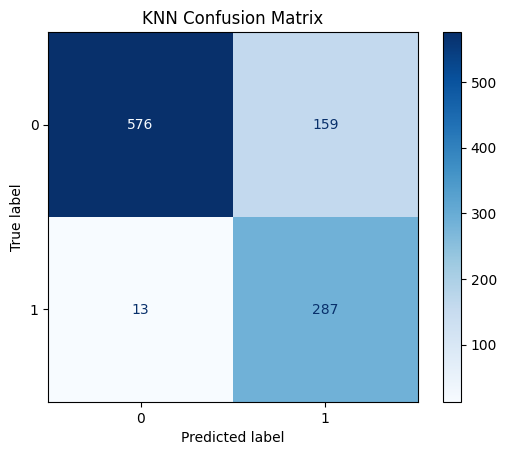

In [35]:
ConfusionMatrixDisplay(cm_knn, display_labels=[0, 1]).plot(cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

In [36]:
svm = SVC(kernel='rbf', gamma='auto')  # 'rbf' kernel for non-linear data
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


In [37]:
acc_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

print("✅ SVM Accuracy:", acc_svm)
print("✅ SVM Precision:", precision_svm)
print("✅ SVM Recall:", recall_svm)
print("✅ SVM Confusion Matrix:\n", cm_svm)

✅ SVM Accuracy: 0.9304347826086956
✅ SVM Precision: 0.9830508474576272
✅ SVM Recall: 0.7733333333333333
✅ SVM Confusion Matrix:
 [[731   4]
 [ 68 232]]


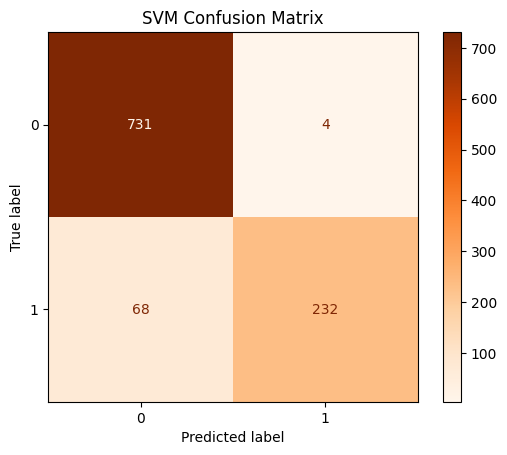

In [38]:
ConfusionMatrixDisplay(cm_svm, display_labels=[0, 1]).plot(cmap='Oranges')
plt.title("SVM Confusion Matrix")
plt.show()